<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_09_Lab05_SHM_mass_spring_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectations for All Notebooks
* Be sure to read instructions carefully and answer all questions.
* Use formatted printing and descriptive print statements
* You must include comment strings for all functions
* ALL PLOTS NEED LABELS ON X AND Y AXES
* If more than one data set is plotted, you must include a legend.
* Plot discrete data with points rather than a line.
```python
plt.plot(x, y, 'bs')
```
or
```python
plt.scatter(x,y)
```

# Overview

### Part 1: Visualize Data and Determine Analytic Solution
* Plot data of mass oscillating on a spring
* determine the analytic solution
* check your answer with me!

### Part 2: Model Motion with the Euler Method
* Implement the Euler method
* Compare Euler solution with your analytic solution
* Plot the energy of the Euler solution vs time.

### Part 3: Model Motion with the Euler-Cromer Method
* Implement the Euler-Cromer method
* Compare Euler-Cromer solution with your analytic solution
* Plot the energy of the Euler solution vs time.


# Part 1: Visualize Data and Plot Solution for Simple Harmonic Oscillator

* We will visualize data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |    |  |  |
| $\omega$ |    |  |  |
| $\phi$   |    |  |  |

### 0. Import modules

In the cell below, import numpy and matplotlib

In [1]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt

### 1. Transfer Data and Import Data Into Colab

(5 points)

* We will use `wget` to transfer data from github.
* We need to first install `wget` using `pip`.
* We can then read the data in and create a plot of position vs time.



In [2]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2c4b94abb3231d3d7996e14f6f36af9206b3b1fcf2fd00fbc46edf0b6a40cc0b
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [3]:
!wget https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv


--2025-02-24 19:37:54--  https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619 (7.4K) [text/plain]
Saving to: ‘shm_mass_spring_good.csv’

shm_mass_spring_goo 100%[===================>]   7.44K  --.-KB/s    in 0s      

2025-02-24 19:37:54 (67.2 MB/s) - ‘shm_mass_spring_good.csv’ saved [7619/7619]



In [226]:
# use astropy to read in your data file
from astropy.io import ascii
data = ascii.read("shm_mass_spring_good.csv",delimiter=',')

In [227]:
# print data so you can see the column names
print(data)

Time(s)    Position(m)        Velocity(m/s)      Acceleration(m/s²) 
------- ------------------ -------------------- --------------------
    0.0 0.7541000247001648  -0.3215557336807251 -0.15655027495490179
   0.05 0.7390000224113464  -0.3373613953590393  0.14201297804161353
    0.1 0.7200999855995178 -0.33523350954055786   0.7024558274834244
   0.15 0.7026000022888184 -0.27916669845581055    1.463993427194195
    0.2 0.6905999779701233 -0.18211093213823107    2.121455231566488
   0.25 0.6830000281333923 -0.05294422308603924    2.457720887513809
    0.3 0.6851000189781189  0.08227772182888456    2.372621073399061
   0.35 0.6926000118255615  0.19272204902436996    2.012962286854967
    0.4 0.7042999863624573  0.29349995983971483   1.3467592773614105
   0.45 0.7232000231742859   0.3537221087349786  0.16296279651147347
    ...                ...                  ...                  ...
   4.55 0.7423999905586243  -0.3024443321757852  -0.8412653465329787
    4.6 0.7232000231742859 -0.3208

* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [228]:
# save the time and position data
time = data["Time(s)"]
position = data["Position(m)"]
velocity = data["Velocity(m/s)"]
# subtract the mean of the position from the position
position = position - np.mean(position)

### 3. Visualize and Analyze The Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using matplotlib.

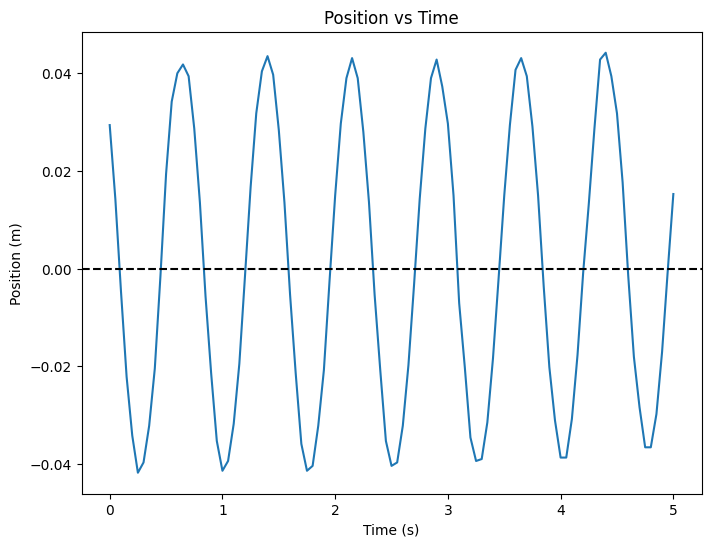

In [229]:
# code to plot your position vs time data here
plt.figure(figsize=(8,6))
plt.plot(time,position)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time")
plt.axhline(0, ls = '--', color ="k")
plt.show()

#### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.



In [230]:
# values of period and amplitude from the graph

A = 0.043 # amplitude in m (Height of Peak)
T = 0.75 # period in sec (Peak to Peak)


##### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [231]:
# calculate omega

omega = 2*np.pi/T
print(omega)

8.377580409572781


#### Plot the Data and the Analytic Solution

(5 points)

* Copy your code for plotting the position versus time
* Add code to overplot the analytic solution on the same figure.

* Determine the best value of $\phi$ using trial and error.


In [232]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def position_analytic(A,omega,phi,t):
  position = A*np.cos(omega*t + phi)
  return position


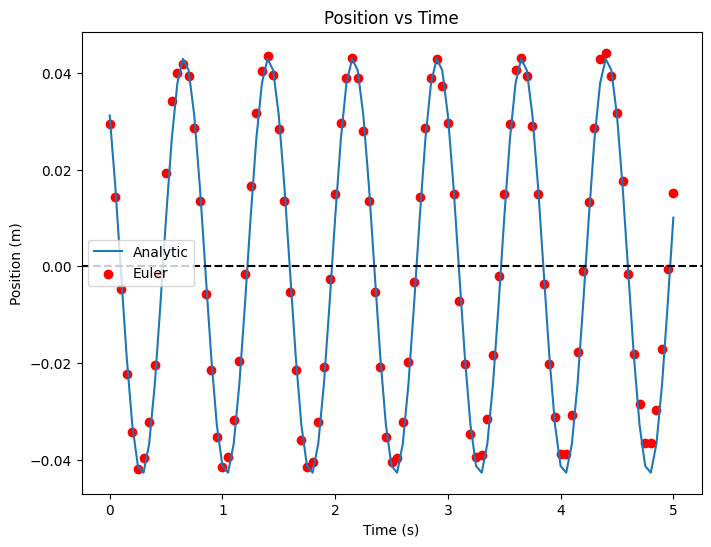

In [233]:
# enter your code to plot your data and analytic solution
# be sure to use your function
position_analytic = position_analytic(A, omega, 0.76, time)

plt.figure(figsize=(8,6))
plt.plot(time,position_analytic,label="Analytic")
plt.scatter(time,position,color='r',label="Euler")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time")
plt.axhline(0, ls = '--', color ="k")
plt.legend()
plt.show()




### 4. Record the initial position and velocity

(5 points)

* Use a formatted print statement to display the initial position and velocity of the mass oscillating on a spring. Enter your values in the Table below.
* Enter the value for the angular frequency, $\omega$.
* Enter the value for the spring constant, $k$, divided by the mass, $\omega$.

| Parameter | Value |
|--|--|
|$x_0$ | |
|$v_0$ | |
| $\omega$ | |
| $k/m$ | |

In [234]:
print(f"x0 = {position[0]}")
print(f"v0 = {velocity[0]}")
print(f"omega = {omega}")
print(f"k/m = {omega**2}")

x0 = 0.02933467673783252
v0 = -0.3215557336807251
omega = 8.377580409572781
k/m = 70.18385351885765


# Part 2 - Model Motion with Euler Method

*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

### Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $x$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [248]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k, m, x):
  """
  description: Calculates acceleration using Hooke's law

  parameters: Using initial values for k (Spring Constant), m (Mass), and x (Displacement)

  return: Acceleration
  """
  # your code here
  acceleration = -(k/m)*x
  return acceleration


### Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [275]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0, v0, tmax, dt):
  """
  description: Creates and initializes position array, velocity array, and time array

  parameters: Using initial values for x0 (Initial Position), v0 (Initial Velocity), tmax (Total Time), and dt (Time Step).

  return: Time Array, Position Array, and Velocity Array
  """
  nsteps = int(tmax/dt)
  time = np.zeros(nsteps)
  position = np.zeros(nsteps)
  velocity = np.zeros(nsteps)
  time[0] = 0
  position[0] = x0
  velocity[0] = v0
  return time, position, velocity

### Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [276]:
# write your calculate function here
def calculate(time, x0, v0, k, m, dt):
  """
  description: Calculates position and velocity using Euler Method

  parameters: Using initial values for time, position, velocity, k (Spring Constant), m (Mass), and dt (Time Step).

  return: Time Array, Position Array, and Velocity Array
  """
  # your code here
  for i in range(1,len(time)):
    time[i] = time[i-1] + dt
    position[i] = position[i-1] + velocity[i-1]*dt
    velocity[i] = velocity[i-1] + acceleration(k, m, position[i-1])*dt
  return time, position, velocity

### Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


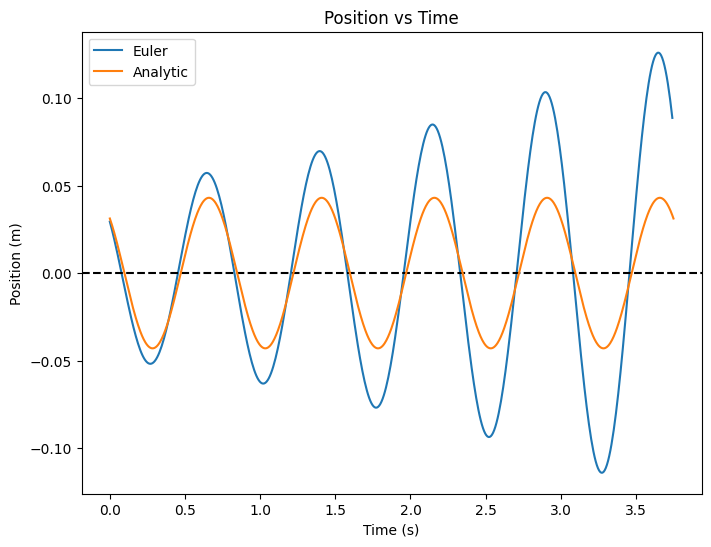

In [285]:

# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = position[0]
vx0 = velocity[0]

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.043
m = 0.150
k = m*omega**2

# Enter the period you determined from Part 1
T = 0.75
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T

# call initialize
initialize(x0, vx0, tmax, dt)

# call calculate
calculate(time, x0, vx0, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(time, position, label = 'Euler')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time")
plt.axhline(0, ls = '--', color ="k")


# overplot your analytic solution from Part 1

datatime = np.linspace(0,tmax,1000)
A = 0.043 # amplitude in m (Height of Peak)
T = 0.75 # period in sec (Peak to Peak)
omega = 2*np.pi/T


def position_analytic(A,omega,phi,t):
  position = A*np.cos(omega*t + phi)
  return position

position_analytic = position_analytic(A, omega, 0.76, datatime)

plt.plot(datatime, position_analytic, label="Analytic")
plt.legend()
plt.show()

### Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions.
1. (2 points) Does your Euler solution conserve energy? Explain.
### The Euler method shows an increase of energy in the system overtime.
1. (2 points) Is the Euler method a good approach for modeling oscillatory motion? Explain.
### The Euler method doesn't work for simple harmonic motion models due to their gain in energy overtime.


Text(0, 0.5, 'Energy (J)')

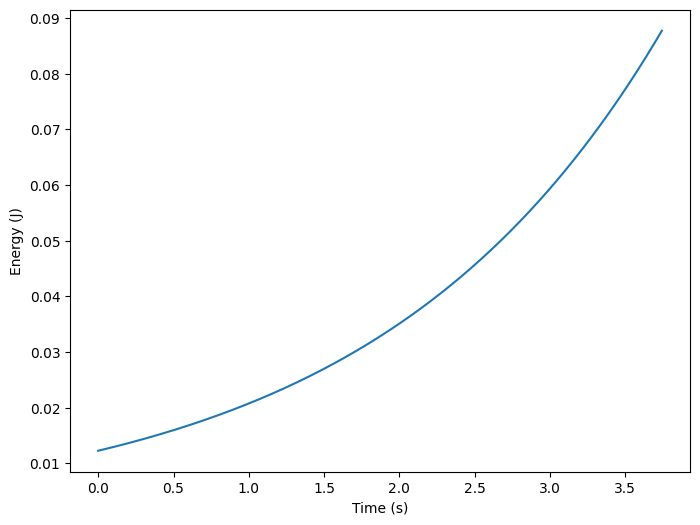

In [293]:
# Your plot of energy vs time here
energy = 0.5*m*velocity**2 + 0.5*k*position**2
plt.figure(figsize=(8,6))
plt.plot(time, energy)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")


# Part 3 - Model Motion with the Euler-Cromer Method

* Copy your calculate function below, but call it `euler_cromer_calculate`
* (5 points) Adjust the code so that:
  * you calculate $v_{i}$ before  $x_{i}$
  * you use $v_{i}$ instead of $v_{i-1}$ when calculating $x_{i}$.
* (5 points) Replot the position vs time.
* (5 points) Replot total energy vs time.


**Questions**

Briefly answer the following questions.
1. (2 points) What is different about the Euler vs Euler-Cromer method?  Which is better to use when modeling simple harmonic motion?
### The Euler-Cromer method is better when it comes to harmonic motion due to how it calculates slightly differently.
1. (2 points) Does the Euler-Cromer solution conserve energy? Justify your answer.
### The Euler-Cromer method conserves energy unlike the Euler method which shows an increase in energy overtime.

In [294]:
# your euler_cromer_calculate

def euler_cromer_calculate(time, x0, v0, k, m, dt):
  """
  description: Calculates position and velocity using Euler-Cromer Method

  parameters: Using initial values for time, position, velocity, k (Spring Constant), m (Mass), and dt (Time Step).

  return: Time Array, Position Array, and Velocity Array
  """
  for i in range(1,len(time)):
    time[i] = time[i-1] + dt
    velocity[i] = velocity[i-1] + acceleration(k, m, position[i-1])*dt
    position[i] = position[i-1] + velocity[i]*dt
  return time, position, velocity

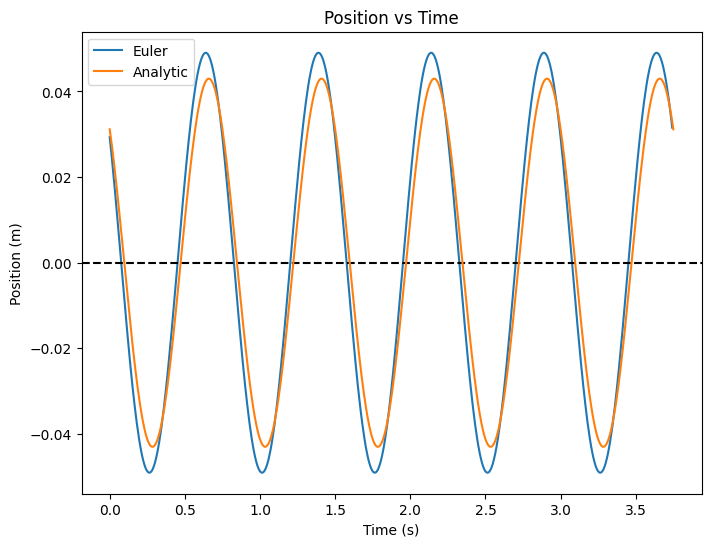

In [295]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate

# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = position[0]
vx0 = velocity[0]

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.043
m = 0.150
k = m*omega**2

# Enter the period you determined from Part 1
T = 0.75
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T

# call initialize
initialize(x0, vx0, tmax, dt)

# call calculate
euler_cromer_calculate(time, x0, vx0, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(time, position, label = 'Euler')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time")
plt.axhline(0, ls = '--', color ="k")


# overplot your analytic solution from Part 1

datatime = np.linspace(0,tmax,1000)
A = 0.043 # amplitude in m (Height of Peak)
T = 0.75 # period in sec (Peak to Peak)
omega = 2*np.pi/T


def position_analytic(A,omega,phi,t):
  position = A*np.cos(omega*t + phi)
  return position

position_analytic = position_analytic(A, omega, 0.76, datatime)

plt.plot(datatime, position_analytic, label="Analytic")
plt.legend()
plt.show()

Text(0, 0.5, 'Energy (J)')

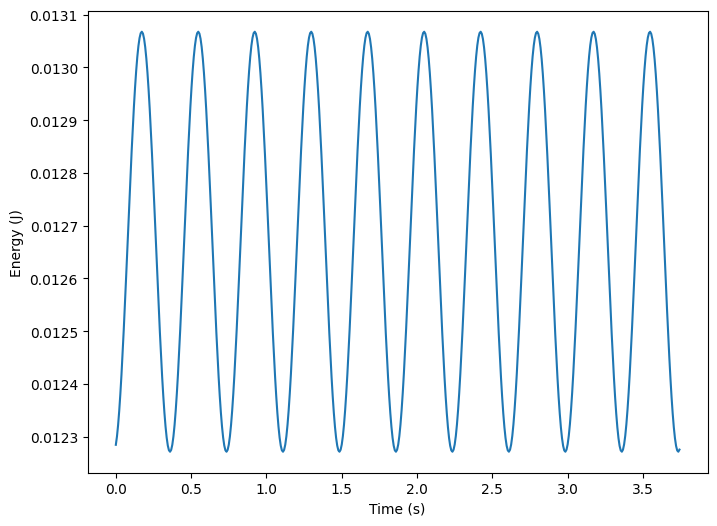

In [300]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here
energy = 0.5*m*velocity**2 + 0.5*k*position**2
plt.figure(figsize=(8,6))
plt.plot(time, energy)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")

#Euler Cromer is much better at simple harmonic oscilators and conserve energy

### Plot Speed vs Position

(5 points)

* Make a plot of $v_x$ versus $x$.
  * Use the scatter command, and color code your points by the time
  ```python
  plt.scatter(x, vx, c=time)
  ```
* Interpret your results. What does the graph of velocity vs. position show?
### The graph shows a circle of motion for the simple harmonic oscillator.

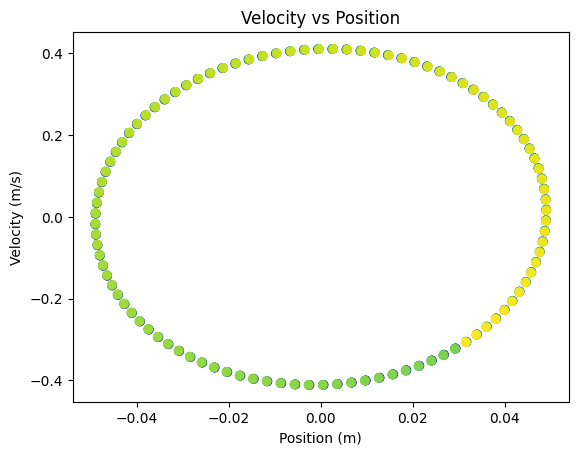

In [298]:
plt.scatter(position, velocity, c=time)
plt.xlabel("Position (m)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs Position")
plt.show()

# Bonus

(5 points)

Adapt your Euler-Cromer method to include a damping force with the form:

$$F_{damping} = - b v_x$$


Test different values of $q$ to reproduce Figure 3.4 in the text.
